# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_df = pd.read_csv(data_url)

X = boston_df.drop(columns=['medv'])
y = boston_df['medv']  

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
print("Valores ausentes em X:\n", X.isnull().sum())
print("Valores ausentes em y:\n", y.isnull().sum())

Valores ausentes em X:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64
Valores ausentes em y:
 0


In [5]:
# Verificar a dimensionalidade de X e y
print("Dimensionalidade de X:", X.shape)
print("Dimensionalidade de y:", y.shape)

Dimensionalidade de X: (506, 13)
Dimensionalidade de y: (506,)


In [6]:
print("Tipos de dados em X:\n", X.dtypes)
print("Tipos de dados em y:\n", y.dtypes)

Tipos de dados em X:
 crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
dtype: object
Tipos de dados em y:
 float64


In [7]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Visualizar os primeiros registros de X e y
print("Primeiros registros de X_train:\n")
X_train.head()

Primeiros registros de X_train:



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


In [8]:
print("Primeiros registros de y_train:\n")
y_train.head()

Primeiros registros de y_train:



477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: medv, dtype: float64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

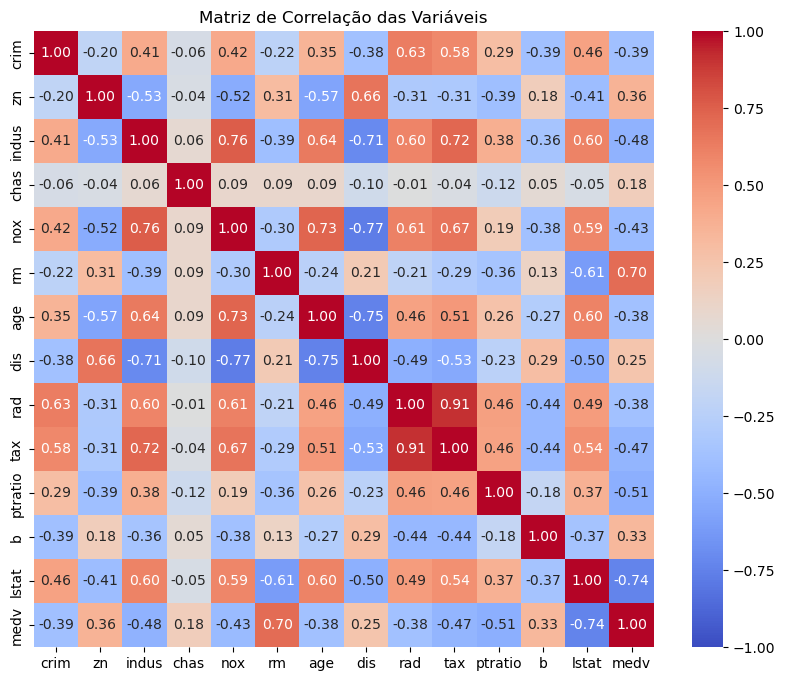

In [9]:
correlation_matrix = boston_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

### 3. Separe os dados em validação e teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de treinamento em conjunto de treinamento e conjunto de validação (75% treinamento, 25% validação)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Exibir o número de amostras em cada conjunto
print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de validação:", X_validation.shape[0])
print("Número de amostras no conjunto de teste:", X_test.shape[0])

Número de amostras no conjunto de treinamento: 303
Número de amostras no conjunto de validação: 101
Número de amostras no conjunto de teste: 102


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [12]:
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
mse_train_tree_max_depth_8 = mean_squared_error(y_train, tree_max_depth_8.predict(X_train))
mse_test_tree_max_depth_8 = mean_squared_error(y_test, tree_max_depth_8.predict(X_test))
mse_train_tree_max_depth_2 = mean_squared_error(y_train, tree_max_depth_2.predict(X_train))
mse_test_tree_max_depth_2 = mean_squared_error(y_test, tree_max_depth_2.predict(X_test))
print("MSE para árvore com profundidade máxima = 8:")
print("  - Conjunto de treinamento:", mse_train_tree_max_depth_8)
print("  - Conjunto de teste:", mse_test_tree_max_depth_8)
print("\nMSE para árvore com profundidade máxima = 2:")
print("  - Conjunto de treinamento:", mse_train_tree_max_depth_2)
print("  - Conjunto de teste:", mse_test_tree_max_depth_2)

MSE para árvore com profundidade máxima = 8:
  - Conjunto de treinamento: 1.4566187389487937
  - Conjunto de teste: 28.921433542827568

MSE para árvore com profundidade máxima = 2:
  - Conjunto de treinamento: 23.122086648660932
  - Conjunto de teste: 27.976621979198132


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Observando esses resultados, podemos perceber que a árvore com profundidade máxima = 8 apresenta um MSE menor no conjunto de treinamento, indicando que ela ajusta melhor os dados de treinamento. No entanto, ela tem um MSE consideravelmente maior no conjunto de teste em comparação com a árvore com profundidade máxima = 2.

Portanto, com base nos resultados fornecidos, a árvore com profundidade máxima = 2 parece mais adequada. Apesar de ter um MSE maior no conjunto de treinamento, ela generaliza melhor para os dados de teste, indicando que está menos propensa a sofrer de overfitting em comparação com a árvore de profundidade máxima = 8.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

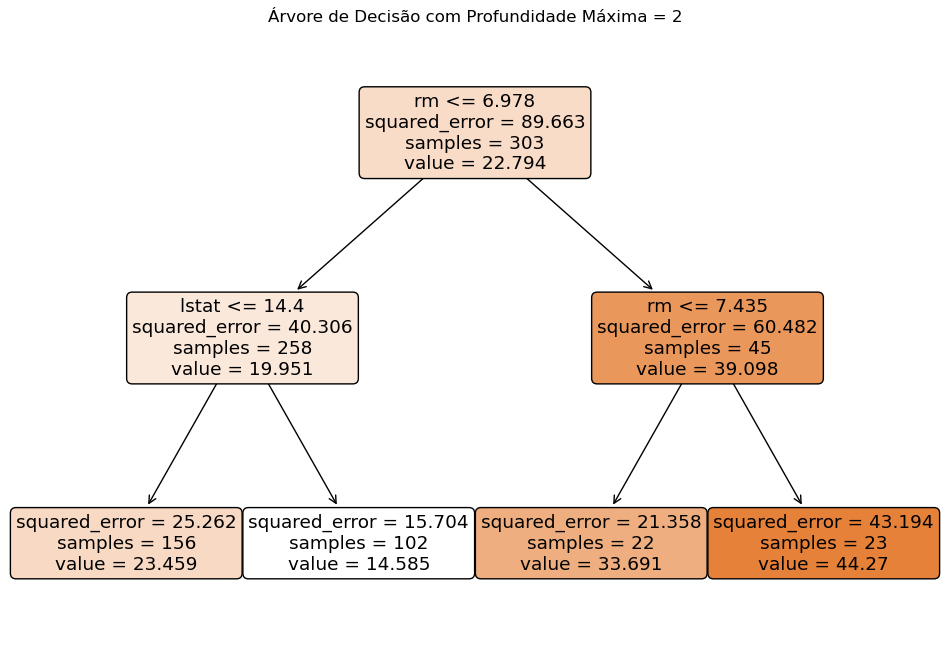

In [18]:
plt.figure(figsize=(12, 8))
plot_tree(tree_max_depth_2, feature_names=list(X.columns), filled=True, rounded=True)
plt.title("Árvore de Decisão com Profundidade Máxima = 2")
plt.show()